## Exercise 1

**1.1 Objective**

Implement a single artificial neuron and understand its components: weights,
bias, and activation function.

**1.2 Dataset**

In [1]:
import numpy as np
import pandas as pd
# Generate synthetic binary classification data
np . random . seed (42)
n_samples = 100
# Generate two classes of points
class1 = np . random . normal ( loc =[2 , 2] , scale =0.5 , size =( n_samples//2 , 2) )
class2 = np . random . normal ( loc =[ -2 , -2] , scale =0.5 , size =( n_samples//2 , 2) )
# Combine data
X = np . vstack ([ class1 , class2 ])
y = np . hstack ([ np . ones ( n_samples //2) , np . zeros ( n_samples //2) ])

**1.3 Tasks**

**1. Neuron Implementation**

*  **Implement weight initialization**



In [2]:
# Initialization of weights and bias
np.random.seed(42)
weights = np.random.randn(2)  # Two weights because inputs have two dimensions

**Add bias term**

In [3]:
bias = np.random.randn()

 **Implement sigmoid activation function**

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


**Create forward propagation method**

In [5]:
def predict(X):
    z = np.dot(X, weights) + bias
    return sigmoid(z)


**2. Training Implementation**

**Calculate a prediction error**

In [6]:
## Train the model

def train(X, y,learning_rate=0.1, epochs=1000):
    global weights, bias  # Modify global variables
    global losses #  List to store the loss for each period
    losses = []

    for epoch in range(epochs):
        #Step 1: Predictions
        predictions = predict(X)

        # Step 2: Error calculation
        error = predictions - y

        # Step 3: Calculating gradients
        gradient_weights = np.dot(X.T, error) / len(y)
        gradient_bias = np.mean(error)

        #Step 4: Update settings
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Loss calculation (Mean Squared Error)
        loss = np.mean((predictions - y) ** 2)
        losses.append(loss)   # Register loss
        
         # Display progress every 100 epochs
        if epoch % 100 == 0:
            loss = np.mean((predictions - y) ** 2)  # Mean square error (MSE)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return losses
  ## Model training
train(X, y,learning_rate= 0.1,epochs=1000)


Epoch 0, Loss: 0.1370
Epoch 100, Loss: 0.0004
Epoch 200, Loss: 0.0001
Epoch 300, Loss: 0.0001
Epoch 400, Loss: 0.0000
Epoch 500, Loss: 0.0000
Epoch 600, Loss: 0.0000
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000


[0.13698988475508,
 0.10004296077259793,
 0.0751587139768631,
 0.05803940649842217,
 0.04594994672767763,
 0.03718238130495606,
 0.030662720782203966,
 0.0257030301538809,
 0.021852454187013554,
 0.01880837860241822,
 0.016362920325805462,
 0.014370119963254362,
 0.012725403801724232,
 0.011352446184936978,
 0.010194585675455857,
 0.009209101777850462,
 0.008363325425581885,
 0.0076319481315755425,
 0.006995129256832127,
 0.006437143999766695,
 0.005945403721183239,
 0.005509736577672246,
 0.005121852739707088,
 0.00477494224167126,
 0.00446336931839739,
 0.0041824377488308565,
 0.003928209023869772,
 0.0036973602117654114,
 0.0034870719413777644,
 0.003294939440387529,
 0.003118901370869541,
 0.002957182512872614,
 0.0028082473038806327,
 0.002670761948849884,
 0.002543563341964439,
 0.0024256334365784253,
 0.0023160779989941753,
 0.0022141089098192397,
 0.0021190293517675467,
 0.002030221358123427,
 0.0019471353013704395,
 0.001869280983878684,
 0.0017962200573962517,
 0.001727559549

**3. Analysis**

**Visualize decision boundary**

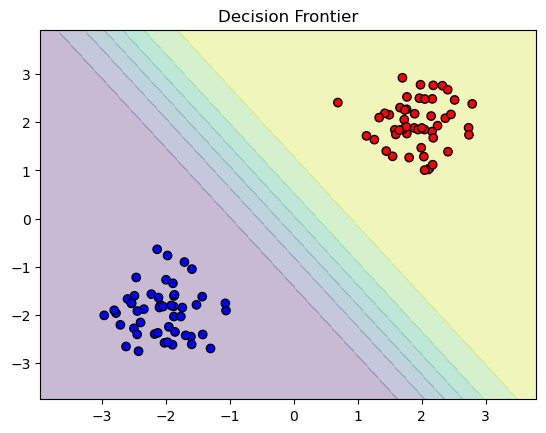

In [7]:
import matplotlib.pyplot as plt

def plot_decision_boundary():
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
    plt.title("Decision Frontier")
    plt.show()

# Display decision boundary
plot_decision_boundary()


The image illustrates the decision boundary of a single artificial neuron used for binary classification. The scatter plot shows two distinct classes: red points (top right) and blue points (bottom left). The background colors represent decision regions, where yellow corresponds to predictions for the red class and purple for the blue class. The diagonal boundary, highlighted by contour lines, reflects the neuron's learned decision function, which is linear due to the single-layer architecture. This visualization demonstrates how a basic artificial neuron can separate two classes in a simple classification task.

**Plot learning curve**

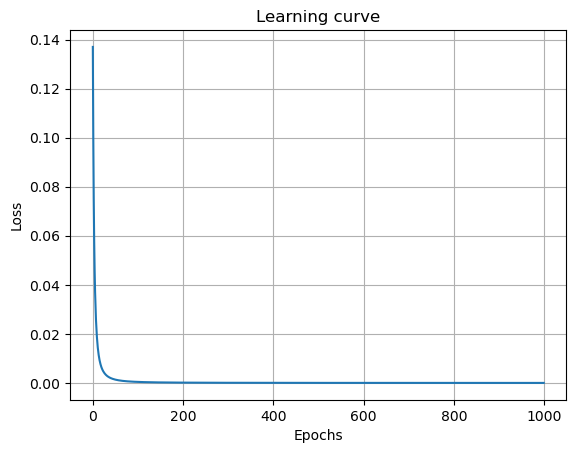

In [8]:
#  Learning curve plot
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning curve")
plt.grid()
plt.show()

The graph above represents the learning curve of a simple neural network, showing the evolution of the loss function over epochs during training. The y-axis denotes the loss, while the x-axis represents the number of epochs.

At the beginning of training, the loss is relatively high (~0.14), indicating poor initial performance. However, the loss rapidly decreases within the first few hundred epochs, demonstrating that the model is quickly learning from the data. After this steep decline, the loss stabilizes near zero, suggesting that the model has effectively minimized its error and converged to an optimal solution.

This behavior is characteristic of a well-trained model with sufficient capacity to learn the given task. However, further analysis is needed to confirm whether the model generalizes well or has overfitted to the training data.

**Test with differents learning rates**

Epoch 0, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 200, Loss: 0.0000
Epoch 300, Loss: 0.0000
Epoch 400, Loss: 0.0000
Epoch 500, Loss: 0.0000
Epoch 600, Loss: 0.0000
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000
Epoch 0, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 200, Loss: 0.0000
Epoch 300, Loss: 0.0000
Epoch 400, Loss: 0.0000
Epoch 500, Loss: 0.0000
Epoch 600, Loss: 0.0000
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000
Epoch 0, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 200, Loss: 0.0000
Epoch 300, Loss: 0.0000
Epoch 400, Loss: 0.0000
Epoch 500, Loss: 0.0000
Epoch 600, Loss: 0.0000
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000
Epoch 0, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 200, Loss: 0.0000
Epoch 300, Loss: 0.0000
Epoch 400, Loss: 0.0000
Epoch 500, Loss: 0.0000
Epoch 600, Loss: 0.0000
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000


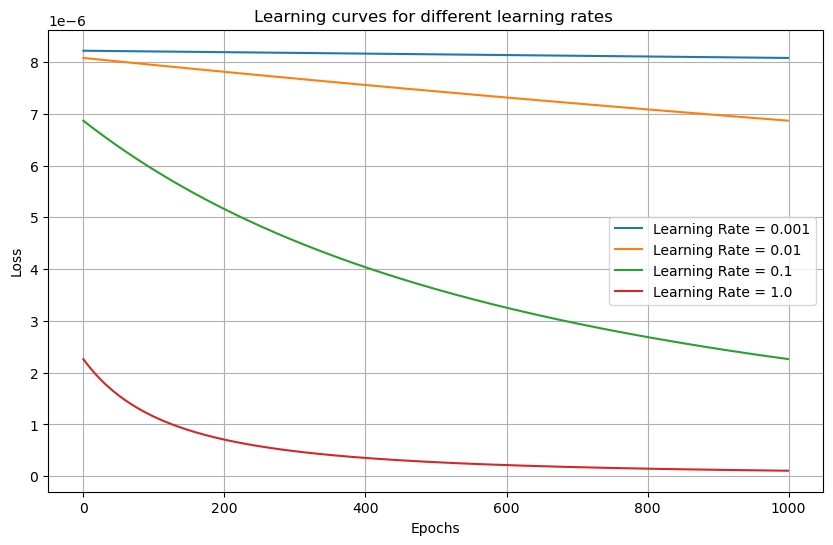

In [9]:
# Create a figure to display all curves on a single graph
plt.figure(figsize=(10, 6))

# Different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1.0]

# Model training for each learning rate and curve plotting
for lr in learning_rates:
    losses = train(X, y, learning_rate=lr, epochs=1000)  # Call your train() function
    plt.plot(losses, label=f"Learning Rate = {lr}")  # Add curve for each lr
    
#  Graphic configuration
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning curves for different learning rates ")
plt.legend()
plt.grid()
plt.show()


The graph shows the impact of different learning rates on the training of a neural network. A very small learning rate (0.001, 0.01) results in slow convergence, with minimal loss reduction over time. A moderate learning rate (0.1) allows for efficient learning, striking a balance between speed and stability. The highest learning rate (1.0) leads to the fastest loss reduction, suggesting rapid convergence. However, further analysis is needed to ensure it does not cause instability. This highlights the importance of selecting an appropriate learning rate to optimize training performance.

## Exercise 2

## 2.1 Objective

Build a complete multilayer perceptron for solving the XOR problem

## 2.2 Dataset

In [10]:
# XOR problem dataset
import numpy as np
X = np . array ([[0 ,0] , [0 ,1] , [1 ,0] , [1 ,1]])
y = np . array ([[0] , [1] , [1] , [0]])

# Create network architecture
input_size = 2
hidden_size = 4
output_size = 1

## 1.3 Tasks
### 1. Neuron Implementation

## Implement weight initialization and bias


In [11]:
#  Initialize weights with random values
np.random.seed(42)
# Weight between input layer and hidden layer
W1 = np.random.randn(input_size, hidden_size) * 0.1
# Hidden layer bias
b1 = np.zeros((1, hidden_size))
# Weight between hidden layer and output layer
W2 = np.random.randn(hidden_size, output_size) * 0.1
#  Output layer bias
b2 = np.zeros((1, output_size))

## Implement ReLU activation for hidden layer

In [12]:
# ReLU activation function for hidden layer
def relu(x):
    return np.maximum(0, x)

# Derivative of the ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Sigmoid function for the output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

## 2. Forward Propagation

### Calculate layer outputs

In [13]:
def forward_propagation(X, W1, b1, W2, b2):
    # Calculation of hidden layer output
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # Application of ReLU activation
    
    # Calculating the output of the output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Applying sigmoid activation
    
    # Storage of intermediate values (useful for backpropagation)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

## 3. Backpropagation

## Calculate output error

In [14]:
def compute_cost(A2, y):
    # Root mean square error
    m = y.shape[0]
    cost = np.sum((A2 - y) ** 2) / (2 * m)
    return cost

In [15]:
def backward_propagation(X, y, cache, W1, W2):
    m = X.shape[0]
    
    #Intermediate value recovery
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    
    # Gradient calculation for the output layer
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    # Gradient calculation for the hidden layer
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return gradients

## Update all weights


In [16]:
def update_parameters(W1, b1, W2, b2, gradients, learning_rate):
    #Gradient extraction
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    # Weight and bias updates
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    return W1, b1, W2, b2


## Implement learning rate scheduling

In [17]:

def learning_rate_schedule(epoch, initial_lr=0.1):
    # Declining learning rates over time
    return initial_lr * (1 / (1 + 0.01 * epoch))

## Exercise 3

## 3.1 Objective

Implement a deep neural network for MNIST digit classification.

## 3.2 Dataset

## 3.3 Tasks
### 1. Implementation

In [ ]:
from sklearn . datasets import load_digits
from sklearn . model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load MNIST data
digits = load_digits ()
X, y = digits .data , digits . target
# Normalize data
X = X / 16.0
# Split dataset
X_train , X_test , y_train , y_test = train_test_split (
X, y, test_size =0.2 , random_state =42)

#### Create multiple hidden layers

In [ ]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 1. Create multiple hidden layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


## Implement dropout regularization

In [ ]:
# 2. Implement dropout regularization
model_dropout = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

## Add batch normalization

In [ ]:
# 3. Add batch normalization
model_batchnorm = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])


## Implement mini-batch training

In [ ]:
# 4. Implement mini-batch training
model_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_batchnorm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


# 2- 2. Training

## 1. Implement cross-entropy loss

In [ ]:
model_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 2. Add momentum to optimization


In [ ]:
optimizer_momentum = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_batchnorm.compile(optimizer=optimizer_momentum, loss='categorical_crossentropy', metrics=['accuracy'])


## 3. Implement early stopping

In [ ]:
# 3. Implement early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_batchnorm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])



## 4. Add learning rate decay

In [ ]:
# 4. Add learning rate decay
lr_decay = optimizers.Adam(learning_rate=0.01, decay=1e-4)
model_batchnorm.compile(optimizer=lr_decay, loss='categorical_crossentropy', metrics=['accuracy'])
model_batchnorm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 3-Evaluation

## 1. Calculate accuracy metrics

In [ ]:
# 1. Calculate accuracy metrics
y_pred =model_batchnorm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

## 2. Create confusion matrix

In [ ]:
# 2. Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3. Visualize misclassified digits

In [ ]:
## 3. Visualize misclassified digits
misclassified_idx = np.where(y_true != y_pred_classes)[0]
plt.figure(figsize=(10,5))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(8,8), cmap='gray')
    plt.title(f'True: {y_true[idx]}, Pred: {y_pred_classes[idx]}')
    plt.axis('off')
plt.show()


## 4. Analyze network predictions


In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

The model performs very well with an accuracy equal to 0.97